# Hair Changer :-)

#### Demo version

### 과감한 헤어스타일 변신이 두려운 당신을 위한 헤어스타일링 프로그램 

그간 새로운 헤어스타일에 도전하고 싶었지만   
이번 학기가 아직 많이 남아 도전하기 두렵다면   
이 프로그램을 이용해보세요!   
당신에게 아프로 헤어스타일이 어울릴 지도 모르는 일입니다.   

우리는 단발, 포마드, 스크래치, 아프로 또는 대머리까지 여러분이 쉽게 시도해보지 못할 여러 헤어스타일을 제공합니다.

---

## 사용법

1. 본인의 사진을 주어진 틀에 맞게 촬영
2. 해당 파일명을 코드에 입력
3. 다양한 헤어스타일 선택지 중 하나를 선택
4. 결과 확인 후 헤어스타일 변신 결정!

----

## 1. 포토부스에서 사진을 촬영하세요!

#### 주의사항. 주어진 틀에 맞추어 사진을 촬영하셔야 합니다.

In [17]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
%matplotlib inline
from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        
        self.layer1 = nn.Sequential(
                        nn.Conv2d(3, 16, 3, padding=1),
                        nn.ReLU(),
                        nn.BatchNorm2d(16),
                        nn.Conv2d(16, 32, 3, padding=1),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.MaxPool2d(2, 2)
        )
        
        self.layer2 = nn.Sequential(
                        nn.BatchNorm2d(32),
                        nn.MaxPool2d(2, 2),
                        nn.Conv2d(32, 32, 3, padding=1),
                        nn.ReLU()
        )
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(x.shape[0], -1)
        return out


In [11]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        
        self.layer1 = nn.Sequential(
                        nn.ConvTranspose2d(32, 32, 3,2, 1, 1),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32, 16, 3, 1, 1),
                        nn.ReLU(),
                        nn.BatchNorm2d(16)
        )
        
        self.layer2 = nn.Sequential(
                        nn.ConvTranspose2d(16, 16, 3, 1, 1),
                        nn.ReLU(),
                        nn.BatchNorm2d(16),
                        nn.ConvTranspose2d(16, 3, 3, 2, 1,1),
                        nn.ReLU()
        )


    def forward(self,x):
        out = x.view(x.shape[0],32,56,56)
        out = self.layer1(out)
        out = self.layer2(out)
        return out

In [21]:
encoder_bald = Encoder().to(device)
decoder_bald = Decoder().to(device)
encoder = Encoder().to(device)
decoder = Decoder().to(device)

encoder_bald.load_state_dict(torch.load('./model/bald_Encoder.pt'))
decoder_bald.load_state_dict(torch.load('./model/bald_Decoder.pt'))

<All keys matched successfully>

---

## 2. 찍은 사진을 불러와 주세요!

In [22]:
image_path = input("pah of face image : ")

pah of face image :  sample_bald


In [23]:
transforms_train = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [24]:
your_img = Image.open('./sample_img/{0}.jpg'.format(image_path)).convert('RGB') 

your_img = transforms_train(your_img).unsqueeze(dim=0).to(device)

---

## 3. 먼저 모델이 잘 동작할 수 있도록 당신의 헤어를 제거합니다.

제거된 나의 대머리 모습을 확인해봅시다.   
이를 통해 출가를 하는 것은 옳지 못한 일이라는 것을 확인할 수 있습니다.  

In [25]:
bald_output = encoder(your_img)
bald_output = decoder(bald_output)

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.imshow(torch.squeeze(bald_output).cpu().detach().numpy().transpose(1, 2, 0))

---

In [1]:
pwd

'C:\\Users\\seojeongP\\Desktop\\2021\\영상처리와 딥러닝\\final_project\\code'

## 4. 원하는 헤어스타일 선택
   
     
##### 1. 단발 (short cut)
<img src="../dataset/img/short2.jpg" width="300" height="300">

##### 2. 포마드 (fomad)
<img src="../dataset/img/fomad.jpg" width="300" height="300">

##### 3. 스크래치 (scratch)
<img src="../dataset/img/scratch4.jpg" width="300" height="300">

##### 4. 아프로 (apro)
<img src="../dataset/img/apro2.jpg" width="300" height="300">

In [51]:
choice = int(input("당신의 선택은"))

당신의 선택은 3


In [52]:
if choice==1:
    model_name = 'short'
elif choice==2:
    model_name = 'fomad'
elif choice==3:
    model_name = 'scratch' 
else:
    model_name = 'apro'

In [53]:
encoder.load_state_dict(torch.load('./model/{0}_Encoder.pt'.format(model_name)))
decoder.load_state_dict(torch.load('./model/{0}_Decoder.pt'.format(model_name)))

<All keys matched successfully>

In [54]:
test_output = encoder(your_img)
test_output = decoder(test_output)

---

## 5. 결과 확인

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


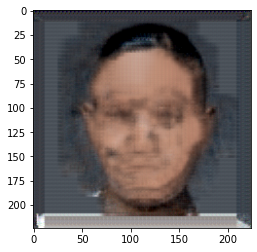

In [55]:
plt.imshow(torch.squeeze(test_output).cpu().detach().numpy().transpose(1, 2, 0))

---

### 지금의 헤어스타일에 감사합시다 ^.^ !